In [52]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm



In [53]:
dftrain=pd.read_csv('C:/Users/tdougherty1/Desktop/AA490 Spring23/Wells Fargo/WFTrain.csv')

In [54]:
dftest=pd.read_csv('C:/Users/tdougherty1/Desktop/AA490 Spring23/Wells Fargo/WFTest.csv', low_memory=False)

model = sm.logit(formula='other ~ nuveen_t12m_sales_other+t24m_sales_muni_bonds+t24m_reds_other+\
                 asset2p', data=dftrain).fit()
print(model.summary())




In [57]:
model = sm.logit(formula='other ~ nuveen_t12m_sales_other+t24m_reds_other+\
                 asset2p', data=dftrain).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.283181
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  other   No. Observations:                 4824
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Apr 2023   Pseudo R-squ.:                  0.2972
Time:                        16:23:31   Log-Likelihood:                -1366.1
converged:                       True   LL-Null:                       -1943.8
Covariance Type:            nonrobust   LLR p-value:                3.402e-250
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.1224      0.083    -37.568      0.000      -3.285   

In [58]:

Xtest = dftest[['nuveen_t12m_sales_other', 't24m_reds_other', 'asset2p']]
ytest = dftest['other']
  
other_yhat = model.predict(Xtest)


In [59]:
dftest['other_yhat'] = other_yhat

In [60]:
print(other_yhat)

0       0.424719
1       0.573752
2       0.786751
3       0.897846
4       0.813045
          ...   
4818    0.401542
4819    0.426679
4820    0.413468
4821    0.999942
4822    0.111477
Length: 4823, dtype: float64


In [61]:

dftest = dftest.sort_values(by = 'other_yhat', ascending = False)


In [62]:
dftest['Other_Quintile'] = pd.qcut(dftest['other_yhat'], 5, labels=[i for i in range (5, 0, -1)])

In [63]:
print(dftest['Other_Quintile'])

577     1
387     1
4815    1
473     1
4475    1
       ..
2400    5
4445    5
4636    5
4635    5
3930    5
Name: Other_Quintile, Length: 4823, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]


In [64]:
dftest['Other_Quintile'] = dftest['Other_Quintile'].astype('int')

In [65]:
dftest['Other_Quintile'].value_counts().reset_index(name='count')


,index,count
0,3,965
1,5,965
2,1,965
3,2,964
4,4,964


In [66]:

buyers = pd.crosstab(dftest['Other_Quintile'], dftest['other'], normalize='index')



In [67]:
print(buyers)

other                  0         1
Other_Quintile                    
1               0.529534  0.470466
2               0.851660  0.148340
3               0.947150  0.052850
4               0.982365  0.017635
5               0.990674  0.009326


In [68]:
 dftest.groupby('Other_Quintile')['nuveen_t3m_sales_other'].mean()

Other_Quintile
1    82687.278135
2    20731.785799
3     2604.580839
4     1197.903226
5      536.824808
Name: nuveen_t3m_sales_other, dtype: float64

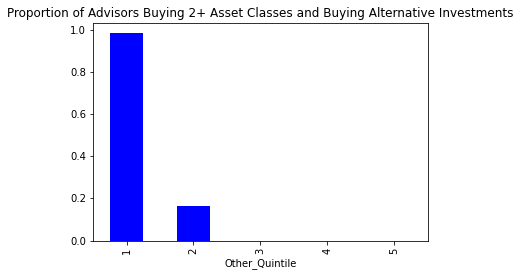

In [69]:
dftest.groupby(by = "Other_Quintile")['asset2p'].mean().plot(kind = "bar", title="Proportion of Advisors Buying 2+ Asset Classes and Buying Alternative Investments", color='blue')


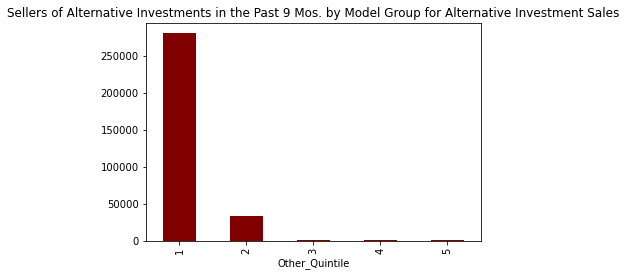

In [71]:
dftest.groupby(by = "Other_Quintile")['nuveen_t12m_sales_other'].mean().plot(kind = "bar", title="Sellers of Alternative Investments in the Past 9 Mos. by Model Group for Alternative Investment Sales", color='maroon')


In [23]:
dftest.to_csv('C:/Users/tdougherty1/Desktop/AA490 Spring23/Wells Fargo/WFTest.csv')